In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2

!pip install imutils

from imutils import paths

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
project_path = '/content/gdrive/My Drive/Kaggle/covid19-xray'
dataset_path = project_path + '/dataset'
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'

%cd /content/gdrive/My Drive/Kaggle/covid19-xray

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle/covid19-xray


In [0]:
%%bash
rm -rf dataset
mkdir -p dataset/covid
mkdir -p dataset/normal
mkdir -p input/covid-chest-xray
mkdir -p input/chest-xray-pneumonia/chest_xray

In [6]:
# download covid dataset
covid_dataset_path = project_path + '/input/covid-chest-xray'
%cd /content/gdrive/My Drive/Kaggle/covid19-xray/input/covid-chest-xray

!kaggle datasets download -d bachrr/covid-chest-xray
!unzip -qq \*.zip
%rm *.zip

/content/gdrive/My Drive/Kaggle/covid19-xray/input/covid-chest-xray
 96% 202M/211M [00:03<00:00, 62.9MB/s]
100% 211M/211M [00:04<00:00, 53.0MB/s]
replace annotations/imageannotation_ai_lung_bounding_boxes.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [0]:
# construct the path to the metadata CSV file and load it
csvPath = os.path.sep.join([covid_dataset_path, "metadata.csv"])
df = pd.read_csv(csvPath)

# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] != "COVID-19" or row["view"] != "PA":
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([covid_dataset_path, "images", row["filename"]])

    # if the input image file does not exist (there are some errors in
    # the COVID-19 metadeta file), ignore the row
    if not os.path.exists(imagePath):
        continue

    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["filename"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/covid", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

In [4]:
# download pneumonia dataset
pneumonia_dataset_path = project_path + '/input/chest-xray-pneumonia/chest_xray'
%cd /content/gdrive/My Drive/Kaggle/covid19-xray/input/chest-xray-pneumonia

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip -qq \*.zip
%rm *.zip

/content/gdrive/My Drive/Kaggle/covid19-xray/input/chest-xray-pneumonia
100% 2.29G/2.29G [00:29<00:00, 118MB/s]
100% 2.29G/2.29G [00:29<00:00, 83.2MB/s]


In [0]:
# build normal xray dataset
samples = 25
basePath = os.path.sep.join([pneumonia_dataset_path, "train", "NORMAL"])
imagePaths = list(paths.list_images(basePath))

# randomly sample the image paths
random.seed(42)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = imagePath.split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/normal", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

In [0]:
def plots_from_files(imspaths, title, rows=1):
    """Plot the images in a grid"""
    f = plt.figure(figsize=(10,5))
    plt.suptitle(title, fontsize=10)
    totalIms = len(imspaths)
    for i in range(totalIms):
        sp = f.add_subplot(rows, -(-totalIms // rows), i + 1)
        sp.axis('Off')
        img = plt.imread(imspaths[i])
        plt.imshow(img)

normal_images = list(paths.list_images(f"{dataset_path}/normal"))
covid_images = list(paths.list_images(f"{dataset_path}/covid"))

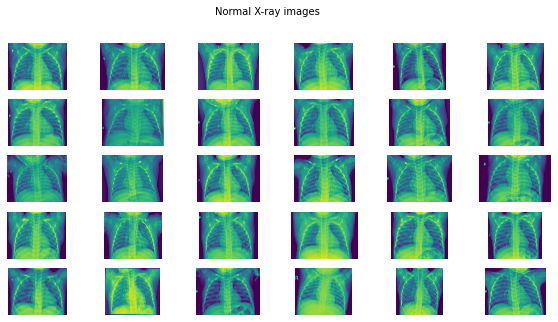

In [25]:
plots_from_files(normal_images, title="Normal X-ray images", rows=5)

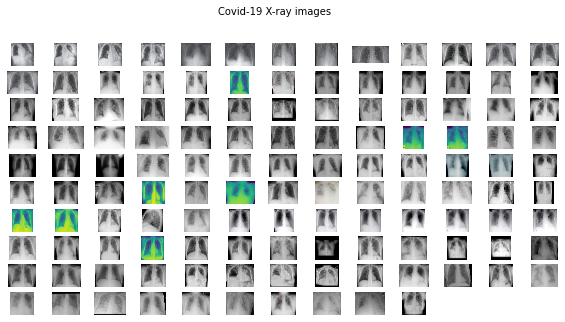

In [26]:
plots_from_files(covid_images, title="Covid-19 X-ray images", rows=10)